# Filter probe pairs that have strong interactions

### 1. Check if BLAST is successfully installed locally

In [2]:
! ls /usr/local/ncbi/blast/bin

blast_formatter            get_species_taxids.sh
blast_formatter_vdb        legacy_blast.pl
blast_vdb_cmd              makeblastdb
blastdb_aliastool          makembindex
blastdbcheck               makeprofiledb
blastdbcmd                 psiblast
blastn                     rpsblast
blastn_vdb                 rpstblastn
blastp                     segmasker
blastx                     tblastn
cleanup-blastdb-volumes.py tblastn_vdb
convert2blastmask          tblastx
deltablast                 update_blastdb.pl
dustmasker                 windowmasker


In [4]:
! makeblastdb -help

USAGE
  makeblastdb [-h] [-help] [-in input_file] [-input_type type]
    -dbtype molecule_type [-title database_title] [-parse_seqids]
    [-hash_index] [-mask_data mask_data_files] [-mask_id mask_algo_ids]
    [-mask_desc mask_algo_descriptions] [-gi_mask]
    [-gi_mask_name gi_based_mask_names] [-out database_name]
    [-blastdb_version version] [-max_file_sz number_of_bytes]
    [-metadata_output_prefix ] [-logfile File_Name] [-taxid TaxID]
    [-taxid_map TaxIDMapFile] [-oid_masks oid_masks] [-version]

DESCRIPTION
   Application to create BLAST databases, version 2.16.0+

REQUIRED ARGUMENTS
 -dbtype <String, `nucl', `prot'>
   Molecule type of target db

OPTIONAL ARGUMENTS
 -h
   Print USAGE and DESCRIPTION;  ignore all other parameters
 -help
   Print USAGE, DESCRIPTION and ARGUMENTS; ignore all other parameters
 -version
   Print version number;  ignore other arguments

 *** Input options
 -in <File_In>
   Input file/database name
   Default = `-'
 -input_type <String, `asn1_bin

In [42]:
! blastn -help

USAGE
  blastn [-h] [-help] [-import_search_strategy filename]
    [-export_search_strategy filename] [-task task_name] [-db database_name]
    [-dbsize num_letters] [-gilist filename] [-seqidlist filename]
    [-negative_gilist filename] [-negative_seqidlist filename]
    [-taxids taxids] [-negative_taxids taxids] [-taxidlist filename]
    [-negative_taxidlist filename] [-no_taxid_expansion]
    [-entrez_query entrez_query] [-db_soft_mask filtering_algorithm]
    [-db_hard_mask filtering_algorithm] [-subject subject_input_file]
    [-subject_loc range] [-query input_file] [-out output_file]
    [-evalue evalue] [-word_size int_value] [-gapopen open_penalty]
    [-gapextend extend_penalty] [-perc_identity float_value]
    [-qcov_hsp_perc float_value] [-max_hsps int_value]
    [-xdrop_ungap float_value] [-xdrop_gap float_value]
    [-xdrop_gap_final float_value] [-searchsp int_value] [-penalty penalty]
    [-reward reward] [-no_greedy] [-min_raw_gapped_score int_value]
    [-template_ty

### 2. Explore probes that form heterodimers using the mSpleen_64_gene probes as an example

Make a BLAST database using all the probe sequences.

In [84]:
! makeblastdb -in ../2nd_structure/Spleen_64_gene.fasta -dbtype nucl -out spleen



Building a new DB, current time: 10/23/2024 13:50:10
New DB name:   /Users/jtian/Documents/Probe_filtering/probe_interaction/spleen
New DB title:  ../2nd_structure/Spleen_64_gene.fasta
Sequence type: Nucleotide
Keep MBits: T
Maximum file size: 3000000000B
Adding sequences from FASTA; added 752 sequences in 0.00510311 seconds.




BLAST each probe against the database using blastn-short (choose the minus strand).

In [90]:
! blastn -task blastn-short -db spleen -query ../2nd_structure/Spleen_64_gene.fasta -strand minus -evalue 0.01 -outfmt 6

Lmo2_pri_6	Cd83_pri_2	100.000	13	0	0	4	16	18	6	0.008	26.3
Cd68_pri_1	Cd68_pri_1	100.000	16	0	0	13	28	28	13	1.15e-04	32.2
Itgax_pri_5	Itgax_pri_5	100.000	14	0	0	5	18	18	5	0.002	28.2
Irf8_pri_5	Cd86_pri_3	100.000	13	0	0	20	32	31	19	0.008	26.3
Cd40_pri_1	Cd40_pri_1	100.000	14	0	0	10	23	23	10	0.002	28.2
Cd83_pri_2	Lmo2_pri_6	100.000	13	0	0	6	18	16	4	0.007	26.3
Cd86_pri_3	Irf8_pri_5	100.000	13	0	0	19	31	32	20	0.008	26.3
Tcf3_pad_3	Runx1_pad_3	94.444	18	1	0	20	37	43	26	0.004	28.2
Tcf3_pad_3	Runx1_pad_2	94.444	18	1	0	20	37	46	29	0.004	28.2
Runx1_pad_2	Tcf3_pad_3	94.444	18	1	0	29	46	37	20	0.004	28.2
Runx1_pad_3	Tcf3_pad_3	94.444	18	1	0	26	43	37	20	0.004	28.2


Here, we only care for the last two columns, which are e-value and bit score, respectively. Better matches have lower e-values and higher bit scores. Usually, a bit score higher than 25 means a strong heterodimer formation and should be filtered out. Unfortunately, this command can only select e-value as a threshold for saving hits. So in the following section, we'll explore the relationship between e-value and how well two probes match in this specific dataset.

Note that the e-value is dependent on the size of the database! Bigger database will result in larger evalues because there's a higher probability that you will find the match by chance.

For a database containing 752 sequences, an e-value < 0.01 will means the sequence pairs already have strong interactions with each other, such as 13 nt dsDNA formation.

In [108]:
# Query= Lmo2_pri_6
! blastn -task blastn-short -db spleen -query Query_spleen.fasta -strand minus -evalue 0.01

BLASTN 2.16.0+


Reference: Stephen F. Altschul, Thomas L. Madden, Alejandro A.
Schaffer, Jinghui Zhang, Zheng Zhang, Webb Miller, and David J.
Lipman (1997), "Gapped BLAST and PSI-BLAST: a new generation of
protein database search programs", Nucleic Acids Res. 25:3389-3402.



Database: ../2nd_structure/Spleen_64_gene.fasta
           752 sequences; 32,833 total letters



Query= Lmo2_pri_6

Length=33
                                                                      Score     E
Sequences producing significant alignments:                          (Bits)  Value

Cd83_pri_2                                                            26.3    0.008


>Cd83_pri_2
Length=32

 Score = 26.3 bits (13),  Expect = 0.008
 Identities = 13/13 (100%), Gaps = 0/13 (0%)
 Strand=Plus/Minus

Query  4   CTTTCAGGAAGTA  16
           |||||||||||||
Sbjct  18  CTTTCAGGAAGTA  6



Lambda      K        H
    1.37    0.711     1.31 

Gapped
Lambda      K        H
    1.37    0.711     1.31 

Effective search 

In [112]:
# Tcf3_pad_3
! blastn -task blastn-short -db spleen -query Query_spleen.fasta -strand minus -evalue 0.01

BLASTN 2.16.0+


Reference: Stephen F. Altschul, Thomas L. Madden, Alejandro A.
Schaffer, Jinghui Zhang, Zheng Zhang, Webb Miller, and David J.
Lipman (1997), "Gapped BLAST and PSI-BLAST: a new generation of
protein database search programs", Nucleic Acids Res. 25:3389-3402.



Database: ../2nd_structure/Spleen_64_gene.fasta
           752 sequences; 32,833 total letters



Query= Tcf3_pad_3

Length=56
                                                                      Score     E
Sequences producing significant alignments:                          (Bits)  Value

Runx1_pad_3                                                           28.2    0.004
Runx1_pad_2                                                           28.2    0.004


>Runx1_pad_3
Length=55

 Score = 28.2 bits (14),  Expect = 0.004
 Identities = 17/18 (94%), Gaps = 0/18 (0%)
 Strand=Plus/Minus

Query  20  ATGGCCTGTAATTATTAC  37
           |||||||||||| |||||
Sbjct  43  ATGGCCTGTAATAATTAC  26


>Runx1_pad_2
Length=58

 Scor

In [117]:
! blastn -task blastn-short -db spleen -query ../2nd_structure/Spleen_64_gene.fasta -strand minus -evalue 0.05 -outfmt 6

Cd3e_pri_6	Il7r_pri_2	100.000	12	0	0	17	28	20	9	0.028	24.3
Tcf7_pri_1	Xcr1_pad_1	100.000	12	0	0	1	12	17	6	0.028	24.3
Lyl1_pri_6	Cd22_pri_3	100.000	12	0	0	1	12	18	7	0.034	24.3
Lmo2_pri_6	Cd83_pri_2	100.000	13	0	0	4	16	18	6	0.008	26.3
Meis1_pri_2	Ifng_pad_1	100.000	12	0	0	12	23	15	4	0.029	24.3
Foxp3_pri_2	Cd79a_pad_2	100.000	12	0	0	3	14	21	10	0.028	24.3
Adgre1_pri_5	H2-Aa_pad_2	100.000	12	0	0	20	31	34	23	0.034	24.3
Adgre1_pri_5	Cd79a_pad_5	100.000	12	0	0	20	31	33	22	0.034	24.3
Adgre1_pri_5	Bcl11b_pad_2	100.000	12	0	0	20	31	32	21	0.034	24.3
Cd68_pri_1	Cd68_pri_1	100.000	16	0	0	13	28	28	13	1.15e-04	32.2
Itgax_pri_5	Itgax_pri_5	100.000	14	0	0	5	18	18	5	0.002	28.2
Itgam_pri_1	Tcf3_pad_3	100.000	12	0	0	11	22	21	10	0.029	24.3
Cd22_pri_3	Lyl1_pri_6	100.000	12	0	0	7	18	12	1	0.029	24.3
Cd22_pri_6	Cd22_pad_2	100.000	12	0	0	14	25	12	1	0.028	24.3
Il7r_pri_2	Cd3e_pri_6	100.000	12	0	0	9	20	28	17	0.035	24.3
Xcr1_pri_1	Ccr4_pri_2	100.000	12	0	0	19	30	31	20	0.031	24.3
Irf8_pri_4	Cd86_pri_3	100.000	12	0	0

For a database containing 752 sequences, an evalue < 0.1 will means the sequence pairs already have moderate interactions with each other, such as 12 nt dsDNA formation.

In [121]:
# Query=Cd3e_pri_6
! blastn -task blastn-short -db spleen -query Query_spleen.fasta -strand minus -evalue 0.05

BLASTN 2.16.0+


Reference: Stephen F. Altschul, Thomas L. Madden, Alejandro A.
Schaffer, Jinghui Zhang, Zheng Zhang, Webb Miller, and David J.
Lipman (1997), "Gapped BLAST and PSI-BLAST: a new generation of
protein database search programs", Nucleic Acids Res. 25:3389-3402.



Database: ../2nd_structure/Spleen_64_gene.fasta
           752 sequences; 32,833 total letters



Query= Cd3e_pri_6

Length=31
                                                                      Score     E
Sequences producing significant alignments:                          (Bits)  Value

Il7r_pri_2                                                            24.3    0.028


>Il7r_pri_2
Length=36

 Score = 24.3 bits (12),  Expect = 0.028
 Identities = 12/12 (100%), Gaps = 0/12 (0%)
 Strand=Plus/Minus

Query  17  ATGTATCTTTAT  28
           ||||||||||||
Sbjct  20  ATGTATCTTTAT  9



Lambda      K        H
    1.37    0.711     1.31 

Gapped
Lambda      K        H
    1.37    0.711     1.31 

Effective search spa

In [126]:
! blastn -task blastn-short -db spleen -query ../2nd_structure/Spleen_64_gene.fasta -strand minus -evalue 0.1 -outfmt 6

Cd3e_pri_6	Il7r_pri_2	100.000	12	0	0	17	28	20	9	0.028	24.3
Tcf7_pri_1	Xcr1_pad_1	100.000	12	0	0	1	12	17	6	0.028	24.3
Lyl1_pri_6	Cd22_pri_3	100.000	12	0	0	1	12	18	7	0.034	24.3
Lmo2_pri_6	Cd83_pri_2	100.000	13	0	0	4	16	18	6	0.008	26.3
Meis1_pri_2	Ifng_pad_1	100.000	12	0	0	12	23	15	4	0.029	24.3
Foxp3_pri_2	Cd79a_pad_2	100.000	12	0	0	3	14	21	10	0.028	24.3
Adgre1_pri_5	H2-Aa_pad_2	100.000	12	0	0	20	31	34	23	0.034	24.3
Adgre1_pri_5	Cd79a_pad_5	100.000	12	0	0	20	31	33	22	0.034	24.3
Adgre1_pri_5	Bcl11b_pad_2	100.000	12	0	0	20	31	32	21	0.034	24.3
Cd68_pri_1	Cd68_pri_1	100.000	16	0	0	13	28	28	13	1.15e-04	32.2
Itgax_pri_5	Itgax_pri_5	100.000	14	0	0	5	18	18	5	0.002	28.2
Itgam_pri_1	Tcf3_pad_3	100.000	12	0	0	11	22	21	10	0.029	24.3
Cd22_pri_3	Lyl1_pri_6	100.000	12	0	0	7	18	12	1	0.029	24.3
Cd22_pri_6	Cd22_pad_2	100.000	12	0	0	14	25	12	1	0.028	24.3
Il7r_pri_2	Cd3e_pri_6	100.000	12	0	0	9	20	28	17	0.035	24.3
Xcr1_pri_1	Ccr4_pri_2	100.000	12	0	0	19	30	31	20	0.031	24.3
Irf8_pri_4	Cd86_pri_3	100.000	12	0	0

In [129]:
# Query=Xcr1_pad_1
! blastn -task blastn-short -db spleen -query Query_spleen.fasta -strand minus -evalue 0.1

BLASTN 2.16.0+


Reference: Stephen F. Altschul, Thomas L. Madden, Alejandro A.
Schaffer, Jinghui Zhang, Zheng Zhang, Webb Miller, and David J.
Lipman (1997), "Gapped BLAST and PSI-BLAST: a new generation of
protein database search programs", Nucleic Acids Res. 25:3389-3402.



Database: ../2nd_structure/Spleen_64_gene.fasta
           752 sequences; 32,833 total letters



Query= Xcr1_pad_1

Length=55
                                                                      Score     E
Sequences producing significant alignments:                          (Bits)  Value

Tcf7_pri_1                                                            24.3    0.056


>Tcf7_pri_1
Length=31

 Score = 24.3 bits (12),  Expect = 0.056
 Identities = 12/12 (100%), Gaps = 0/12 (0%)
 Strand=Plus/Minus

Query  6   AAACACAGGCAG  17
           ||||||||||||
Sbjct  12  AAACACAGGCAG  1



Lambda      K        H
    1.37    0.711     1.31 

Gapped
Lambda      K        H
    1.37    0.711     1.31 

Effective search spa

In [132]:
! blastn -task blastn-short -db spleen -query ../2nd_structure/Spleen_64_gene.fasta -strand minus -evalue 0.2 -outfmt 6

Cd3d_pri_1	Cd3e_pad_2	100.000	11	0	0	22	32	11	1	0.12	22.3
Cd3d_pri_2	Cd3e_pad_2	100.000	11	0	0	21	31	11	1	0.11	22.3
Cd3d_pri_3	Cd3e_pad_2	100.000	11	0	0	21	31	11	1	0.11	22.3
Cd3d_pri_4	Cd3e_pad_2	100.000	11	0	0	21	31	11	1	0.11	22.3
Cd3d_pri_5	Cd3e_pad_2	100.000	11	0	0	22	32	11	1	0.12	22.3
Cd3d_pri_6	Cd3e_pad_2	100.000	11	0	0	22	32	11	1	0.12	22.3
Il2ra_pri_1	Irf8_pad_6	100.000	11	0	0	9	19	11	1	0.11	22.3
Il2ra_pri_6	Cd44_pad_6	100.000	11	0	0	16	26	48	38	0.12	22.3
Il2ra_pri_6	Cd44_pad_5	100.000	11	0	0	16	26	45	35	0.12	22.3
Il2ra_pri_6	Cd44_pad_4	100.000	11	0	0	16	26	45	35	0.12	22.3
Il2ra_pri_6	Cd44_pad_3	100.000	11	0	0	16	26	43	33	0.12	22.3
Il2ra_pri_6	Cd44_pad_2	100.000	11	0	0	16	26	44	34	0.12	22.3
Il2ra_pri_6	Cd44_pad_1	100.000	11	0	0	16	26	44	34	0.12	22.3
Kit_pri_6	Cd40_pri_3	100.000	11	0	0	8	18	12	2	0.13	22.3
Cd3e_pri_6	Il7r_pri_2	100.000	12	0	0	17	28	20	9	0.028	24.3
Cd247_pri_5	Flt3_pri_5	100.000	11	0	0	10	20	18	8	0.13	22.3
Cd247_pri_5	Meis1_pri_6	100.000	11	0	0	20	30	25	15	0.13	22.3

For a database containing 752 sequences, an evalue < 0.2 will means the sequence pairs have weak interactions with each other, such as 11 nt dsDNA formation.

In [135]:
# Query=Cd3d_pri_1
! blastn -task blastn-short -db spleen -query Query_spleen.fasta -strand minus -evalue 0.2

BLASTN 2.16.0+


Reference: Stephen F. Altschul, Thomas L. Madden, Alejandro A.
Schaffer, Jinghui Zhang, Zheng Zhang, Webb Miller, and David J.
Lipman (1997), "Gapped BLAST and PSI-BLAST: a new generation of
protein database search programs", Nucleic Acids Res. 25:3389-3402.



Database: ../2nd_structure/Spleen_64_gene.fasta
           752 sequences; 32,833 total letters



Query= Cd3d_pri_1

Length=32
                                                                      Score     E
Sequences producing significant alignments:                          (Bits)  Value

Cd3e_pad_2                                                            22.3    0.12 


>Cd3e_pad_2
Length=58

 Score = 22.3 bits (11),  Expect = 0.12
 Identities = 11/11 (100%), Gaps = 0/11 (0%)
 Strand=Plus/Minus

Query  22  ATTGTTATCTT  32
           |||||||||||
Sbjct  11  ATTGTTATCTT  1



Lambda      K        H
    1.37    0.711     1.31 

Gapped
Lambda      K        H
    1.37    0.711     1.31 

Effective search space u

### 3. Filter probes from the mSpleen_64_gene probe library.

Save the BLAST result into spleen.out

In [138]:
! blastn -task blastn-short -db spleen -query ../2nd_structure/Spleen_64_gene.fasta -strand minus -evalue 1 -outfmt 6 -out spleen.out

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [156]:
df = pd.read_csv('spleen.out', sep='\t', header=None)
df.columns = ['query acc.ver', 'subject acc.ver', '% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score']
df.head()

,query acc.ver,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score
0,Cd8a_pri_3,Ccr4_pri_2,100.0,10,0,0,16,25,27,18,0.46,20.3
1,Cd3d_pri_1,Cd3e_pad_2,100.0,11,0,0,22,32,11,1,0.12,22.3
2,Cd3d_pri_2,Cd3e_pad_2,100.0,11,0,0,21,31,11,1,0.11,22.3
3,Cd3d_pri_3,Cd3e_pad_2,100.0,11,0,0,21,31,11,1,0.11,22.3
4,Cd3d_pri_4,Cd3e_pad_2,100.0,11,0,0,21,31,11,1,0.11,22.3


In [175]:
df.shape

(852, 12)

In [173]:
df['query acc.ver'].nunique()

372

In [161]:
df_sorted = df.sort_values(by='evalue', ascending=True)

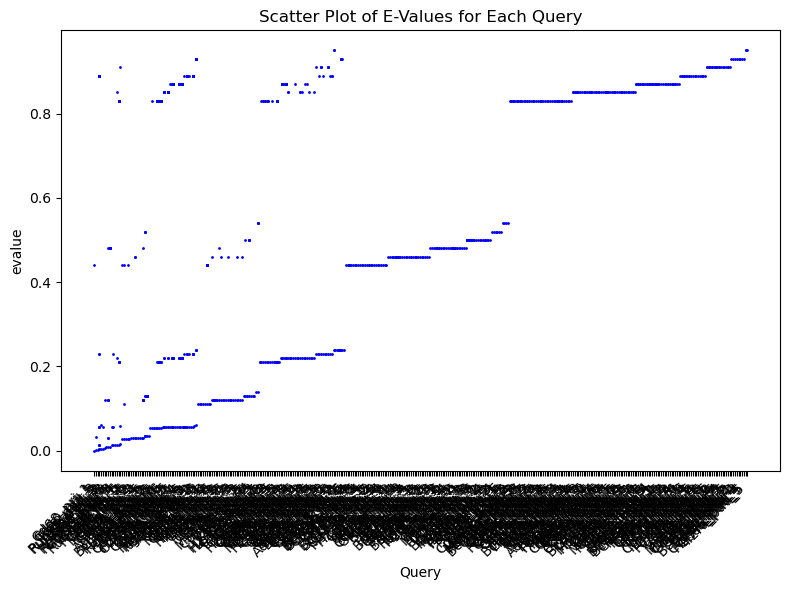

In [167]:
plt.figure(figsize=(8, 6))
plt.scatter(df_sorted["query acc.ver"], df_sorted["evalue"], color='blue', s = 1)

plt.xlabel('Query')
plt.ylabel('evalue')
plt.title('Scatter Plot of E-Values for Each Query')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In this mSpleen_64_gene probe set, a E-value smaller than 0.02 roughly corresponds to a bit score higher than 25. Thus, we may filter out probes that have an E-value smaller than 0.02 in the queries.